In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#graphing
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import numpy as np

#scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV

#for model
from numpy import loadtxt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier


bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

bikes.dteday = pd.to_datetime(bikes.dteday)#, format='%m/%d/%Y')
bikes['totalRental'] = bikes['casual'] + bikes['registered']
#z score scaling
bikes['tempActualScaled']= MaxAbsScaler().fit_transform(bikes[['temp_c']]) 
bikes['tempFeelScaled'] = MaxAbsScaler().fit_transform(bikes[['feels_like_c']]) 


In [ ]:
print(bikes['dteday'])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]


In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dteday            17379 non-null  datetime64[ns]
 1   season            17379 non-null  int64         
 2   hr                17379 non-null  int64         
 3   holiday           17379 non-null  int64         
 4   workingday        17379 non-null  int64         
 5   weathersit        17379 non-null  int64         
 6   hum               17379 non-null  float64       
 7   windspeed         17379 non-null  int64         
 8   temp_c            17379 non-null  float64       
 9   feels_like_c      17379 non-null  float64       
 10  casual            17379 non-null  int64         
 11  registered        17379 non-null  int64         
 12  totalRental       17379 non-null  int64         
 13  tempActualScaled  17379 non-null  float64       
 14  tempFeelScaled    1737

In [ ]:
bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,totalRental,tempActualScaled,tempFeelScaled
0,2011-01-01,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,16,0.084103,0.060028
1,2011-01-01,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,40,0.060000,0.039964
2,2011-01-01,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,32,0.060000,0.039964
3,2011-01-01,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,13,0.084103,0.060028
4,2011-01-01,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,1,0.084103,0.060028


In [ ]:
#bikes['dteday'].describe()

Text(0.5, 1.0, 'Daily Bike Rentals')

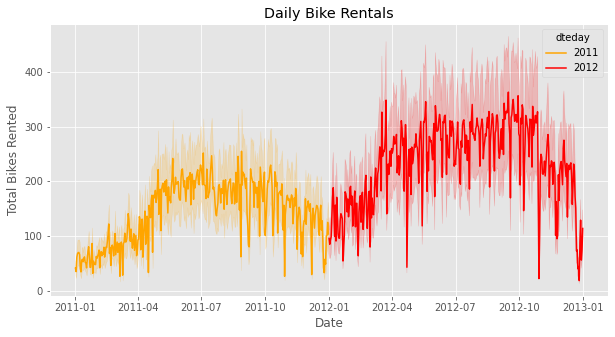

In [ ]:
#sns.lineplot(x='dteday', y=0, df = bikes)
sns.color_palette("tab10")
plt.style.use('ggplot')
sns.lineplot(x = bikes['dteday'], y = bikes["totalRental"], hue= bikes["dteday"].dt.year, palette=['orange','red'])#data = bikes,) 
dateGraph = plt.gcf()
plt.style.use('ggplot')
dateGraph.set_size_inches(10,5)
plt.xlabel("Date")
plt.ylabel('Total Bikes Rented')
plt.title('Daily Bike Rentals')


# New Section

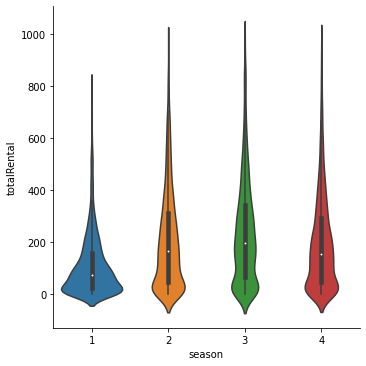

In [ ]:
sns.catplot(y='totalRental', x='season', data=bikes, kind='violin')

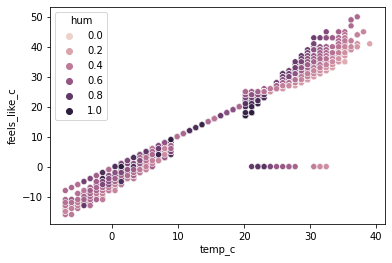

In [ ]:
bikes['tempDif'] = bikes['temp_c'] - bikes['feels_like_c']

sns.scatterplot(x='temp_c', y='feels_like_c', data = bikes, hue='hum')

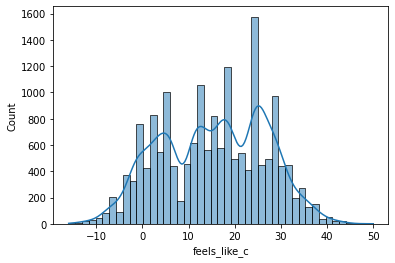

In [ ]:
sns.histplot(x='feels_like_c',  data = bikes, kde=True)

In [ ]:
#sns.scatterplot(y='totalRental', x='windspeed', data = bikes, type='jitter')

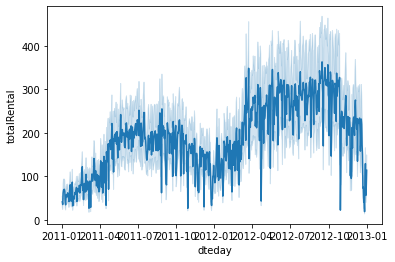

In [ ]:
sns.lineplot(x='dteday',y='totalRental', data=bikes)

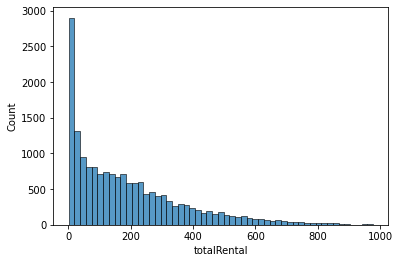

In [ ]:
sns.histplot(x='totalRental', data = bikes)

*italicized text*# Model

# Model

In [ ]:
from sklearn.model_selection import train_test_split
# load the dataset

# split into input (X) and output (y) variables
X=bikes.drop(['totalRental', 'temp_c', 'feels_like_c', 'dteday', 'tempActualScaled','hum', 'registered', 'casual'], axis=1).values.tolist()
y = bikes.totalRental.values.tolist()

# y = to_categorical(y) #converting output to one-hot vector
#ss = StandardScaler() #standardizing the data
#standardized
#X = ss.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(X, y,  
                      test_size = 0.3, random_state = 123) 
model = Sequential([
    Dense(128, activation='tanh', input_dim = 7, kernel_regularizer='l1'),
    Dense(256, activation='tanh', kernel_regularizer='l1'),
    tf.keras.layers.Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer='l1'),
    Dense(1, activation='linear', kernel_regularizer='l1')          
])



# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset                                          This is bad?? validating with test data?
hist = model.fit(train_X, train_y, epochs=50,validation_data=(test_X,test_y))


In [ ]:
mse = model.evaluate(test_X, test_y)
print('MSE: %.2f' % (mse**0.5))

163/163 [==============================] - 0s 1ms/step - loss: 6596.6895
RMSE: 81.22
MSE: 6596.69


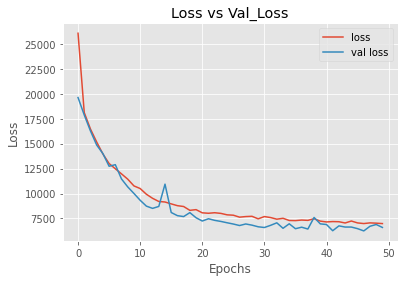

In [ ]:
mse = model.evaluate(test_X, test_y)
print('RMSE: %.2f' % (mse**0.5))
print('MSE: %.2f' % (mse))
plt.style.use('ggplot')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
def CreateModel():
  #sets the layers
  model = Sequential([
    Dense(13, activation='tanh', input_dim = 12),
    Dense(13, activation='tanh'),
    Dense(4, activation='tanh'),
    Dense(1, activation='sigmoid')          
  ])


  # compile the keras model
  model.compile(loss='mse', optimizer='adam', metrics=['mse', 'accuracy'])
  return model


ModuleNotFoundError: ignored

In [ ]:
train_Xnp = np.array(train_X)
train_ynp = np.array(train_y)

In [ ]:
#Gridsearch
gridmodel = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=CreateModel, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100, 150, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=gridmodel, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(train_Xnp, train_ynp)


NameError: ignored

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))